# DSCI 100 Project

## Introduction


***Background***

Test

***Predictive Question***



***Data***

## Methods and results


***Importing Packages***

In [1]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(GGally)
library(broom)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



***Loading Data***

In [2]:
stroke <- read_csv('data/stroke_data.csv')

stroke |>
    head(10)

Rows: 5110 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, ever_married, work_type, Residence_type, bmi, smoking_status
dbl (6): id, age, hypertension, heart_disease, avg_glucose_level, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
27419,Female,59,0,0,Yes,Private,Rural,76.15,N/A,Unknown,1


***Wrangling***


In [3]:
# subtracting 1 from the as.numeric since factor index starts at 1,
# but we want to start at 0 for consistency

stroke_numeric <- stroke |>
    select(-id) |>
    mutate(stroke = as_factor(stroke)) |>
    mutate(ever_married = as.numeric(as_factor(ever_married)) - 1) |>
    mutate(Residence_type = as.numeric(as_factor(Residence_type)) - 1) |>
    mutate(work_type = as.numeric(as_factor(work_type)) - 1) |>
    mutate(gender = as.numeric(as_factor(gender)) - 1) |>
    mutate(smoking_status = as.numeric(as_factor(smoking_status)) - 1) |>
    filter(bmi != "N/A") |>
    mutate(bmi = as.numeric(bmi))

stroke_numeric |>
    head(10)

gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,67,0,1,0,0,0,228.69,36.6,0,1
0,80,0,1,0,0,1,105.92,32.5,1,1
1,49,0,0,0,0,0,171.23,34.4,2,1
1,79,1,0,0,1,1,174.12,24.0,1,1
0,81,0,0,0,0,0,186.21,29.0,0,1
0,74,1,1,0,0,1,70.09,27.4,1,1
1,69,0,0,1,0,0,94.39,22.8,1,1
1,78,0,0,0,0,0,58.57,24.2,3,1
1,81,1,0,0,0,1,80.43,29.7,1,1


In [4]:
temp_stroke <- stroke_numeric |>
    select(stroke)

stroke_scaled <- stroke_numeric |>
    select(-stroke) |>
    mutate(across(everything(), scale)) |>
    bind_cols(temp_stroke)

stroke_scaled |>
    head(10)

gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
-1.1998205,1.0700290,-0.3180343,4.3815219,-0.729410,-0.7495475,-0.9855395,2.77741545,0.98124492,-1.4528566,1
-1.1998205,1.6463949,-0.3180343,4.3815219,-0.729410,-0.7495475,1.0144660,0.01384039,0.45922236,-0.5355482,1
0.8318866,0.2719838,-0.3180343,-0.2281847,-0.729410,-0.7495475,-0.9855395,1.48398039,0.70113526,0.3817603,1
0.8318866,1.6020591,3.1436741,-0.2281847,-0.729410,0.1400871,1.0144660,1.54903481,-0.62301952,-0.5355482,1
-1.1998205,1.6907307,-0.3180343,-0.2281847,-0.729410,-0.7495475,-0.9855395,1.82118292,0.01359335,-1.4528566,1
-1.1998205,1.3803799,3.1436741,4.3815219,-0.729410,-0.7495475,1.0144660,-0.79269943,-0.19012277,-0.5355482,1
0.8318866,1.1587006,-0.3180343,-0.2281847,1.370692,-0.7495475,-0.9855395,-0.24570201,-0.77580661,-0.5355482,1
0.8318866,1.5577232,-0.3180343,-0.2281847,-0.729410,-0.7495475,-0.9855395,-1.05201673,-0.59755501,1.2990687,1
0.8318866,1.6907307,3.1436741,-0.2281847,-0.729410,-0.7495475,1.0144660,-0.55994415,0.10271915,-0.5355482,1


***Summary***



In [5]:
set.seed(2020)

stroke_ks <- tibble(k = 1:25)

elbow_stats <- stroke_ks |>
    rowwise() |>
    mutate(tourism_clusts = list(kmeans(stroke_scaled, k, nstart=25))) |>
    mutate(glanced = list(glance(tourism_clusts))) |>
    select(-tourism_clusts) |>
    unnest(glanced)

***Visualization***


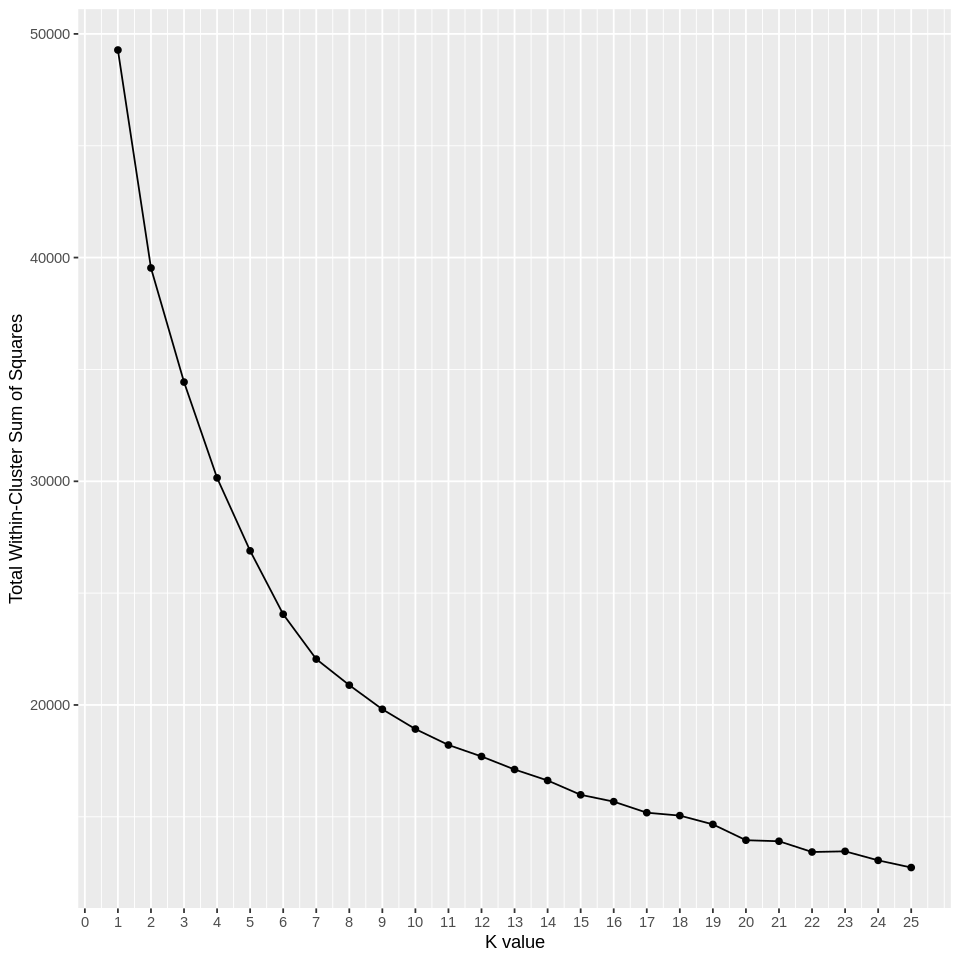

In [6]:
set.seed(2020)
options(repr.plot.height = 8, repr.plot.width = 8)

stroke_elbow_plot <- elbow_stats |>
    ggplot(aes(x = k, y = tot.withinss)) +
        geom_point() +
        geom_line() +
        labs(x = "K value", y = "Total Within-Cluster Sum of Squares") +
        scale_x_continuous(breaks = seq(0, 25, 1))
stroke_elbow_plot

***Analysis***

## Discussion

***Findings***


***Significance***

## References


-citations for readings and data used to complete the project-